# Introduction

This project predicts the mean house price of districts of California using multiple linear regression model.

# Data source

The data contains information from the 1990 California census.

Data source - [california housing dataset - kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

# Loading the data

In [2]:
import pandas as pd

housing = pd.read_csv("./data/housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


So there are 20640 rows and 10 columns.

`ocean_proximity` is a categorical variable. Let's see the categories available.

In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Let's get the statistical summary of numerical attributes

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Let's plot a histogram of numerical values to get the distribution of the data.

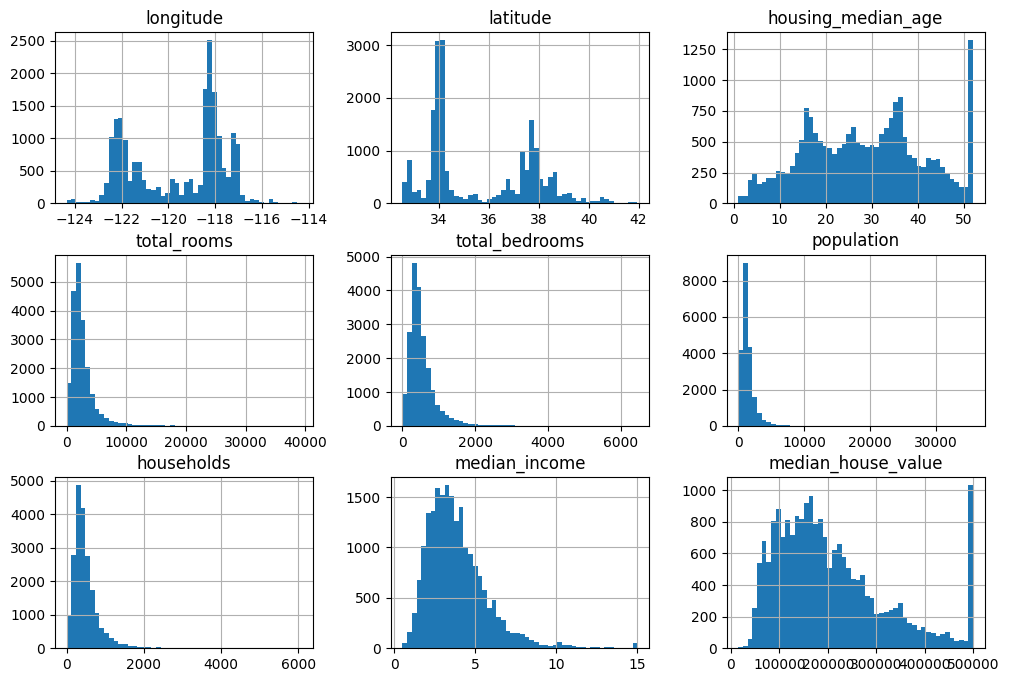

In [7]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))

plt.show()

Observations from above exploration - 

* `medium_income` is scaled and capped between 0.499900 and 15.000100. The numbers represent roughly tens of thousands of dollars (e.g., 1 actually means about $10,000).

* The housing median age and the median house value were also capped.

* The attributes have different scales


# Creating test set

As per the research the median income is a very important attribute to predict median housing prices. So the test set must be the representative of the various categories of income. The `median_income` attribute is a continuous numerical variable so let's first create income categories.

In [9]:
import numpy as np
housing["income_category"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

In [11]:
housing["income_category"].value_counts()

income_category
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

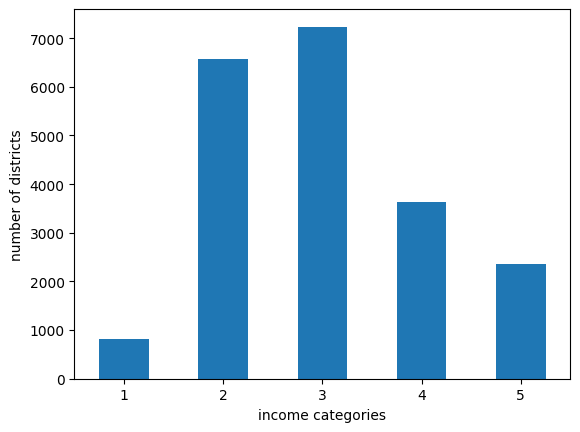

In [14]:
housing["income_category"].value_counts().sort_index().plot.bar(rot=0)
plt.xlabel("income categories")
plt.ylabel("number of districts")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
train_set, test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_category"], random_state=40)

In [22]:
train_set["income_category"].value_counts()/len(train_set)

income_category
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [23]:
test_set["income_category"].value_counts()/len(test_set)

income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

So the proportion of income categories is almost same in training set and test set.

Let's drop the `income_category` column as it's not required anymore.

In [24]:
train_set = train_set.drop("income_category", axis=1)
test_set = test_set.drop("income_category", axis=1)

# Data exploration

Let's create a copy of the train set for data exploration. We will use a copy of train set Since the data may go through some transformation. So the original train set reamins intact.

In [25]:
housing = train_set.copy()

## Visualizing geographical data

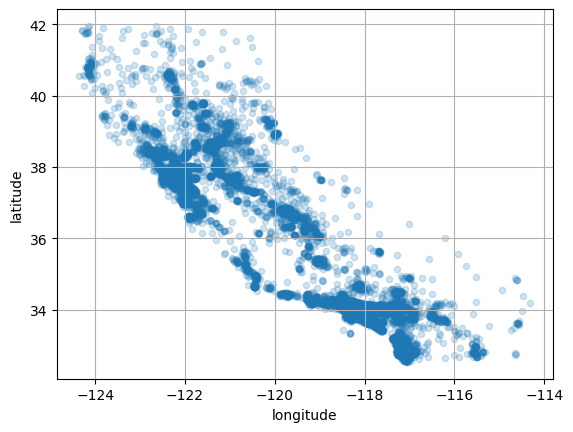

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

By comparing the map of california and geographicla visualization of california housing data we can see the high density areas like Bay area, los angeles, san diego, and areas in central valley.

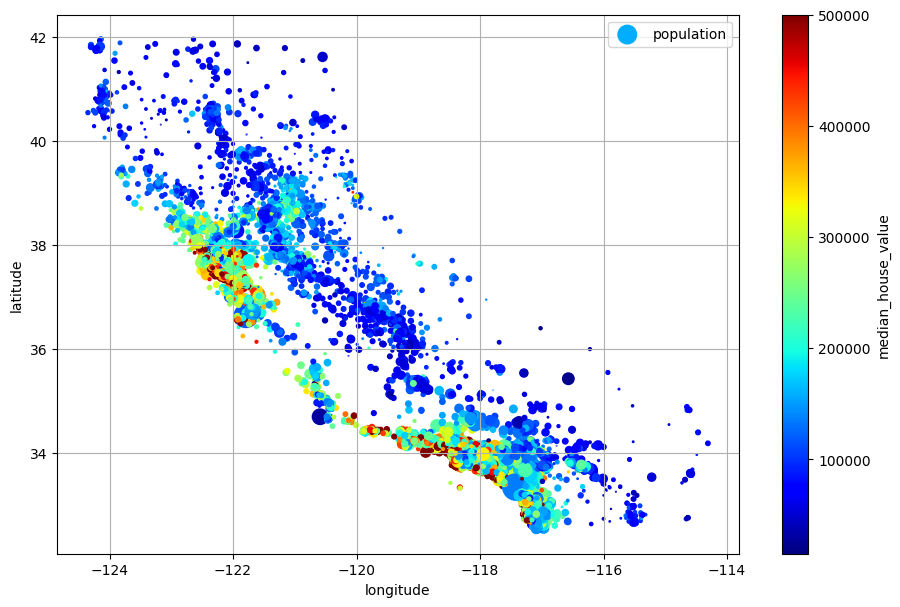

In [40]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/100, label="population", 
             c="median_house_value", cmap="jet", colorbar=True, legend=True, figsize=(11, 7))
plt.show()

The housing prices are higher in coastal area and higher population density areas.

## Looking for correlations

Let's compute the standard correlation coefficients also known as Pearson's r.

In [49]:
columns = list(housing.columns)

# removing "ocean_proximity" from column names as it contains categorical data
columns.remove("ocean_proximity")

In [52]:
corr_matrix = housing[columns].corr()
corr_matrix["median_house_value"]

longitude            -0.051167
latitude             -0.137691
housing_median_age    0.105329
total_rooms           0.138007
total_bedrooms        0.052814
population           -0.021544
households            0.070014
median_income         0.686865
median_house_value    1.000000
Name: median_house_value, dtype: float64

## Scatter matrix to find the correlation

From the correlation coefficent matrix let's pick `median_income`, `housing_median_age`, `total_rooms`, and `median_house_value` because these attributes are most correlated with housing prices

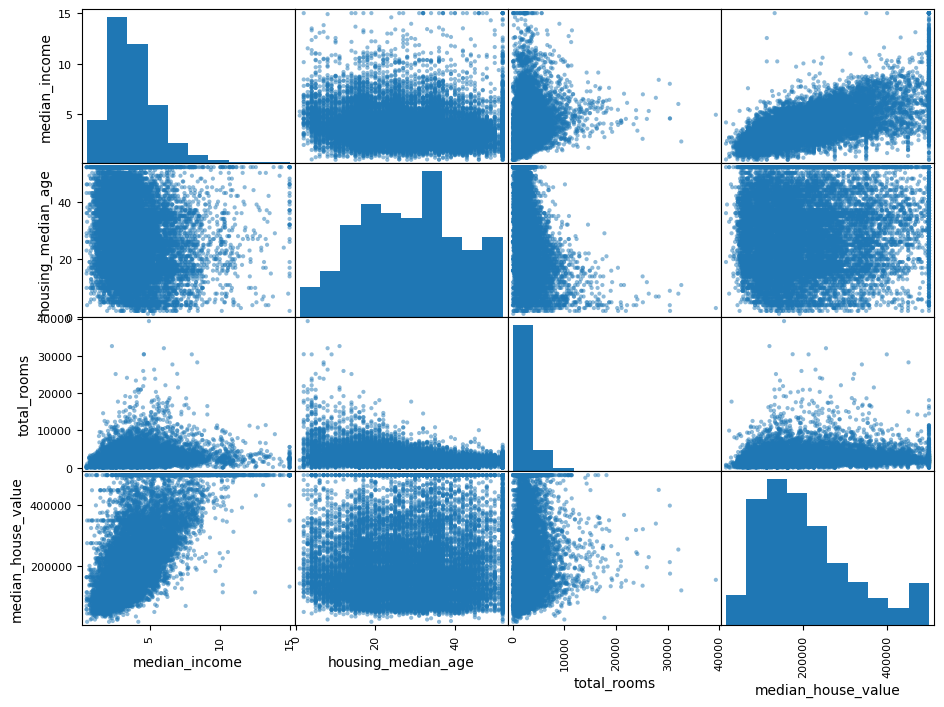

In [54]:
from pandas.plotting import scatter_matrix

columns_sca_mat = ["median_income", "housing_median_age", "total_rooms", "median_house_value"]

scatter_matrix(housing[columns_sca_mat], figsize=(11, 8))
plt.show()

The scatter matrix suggests that the most promising correlation to predict housing prices is `median_income`

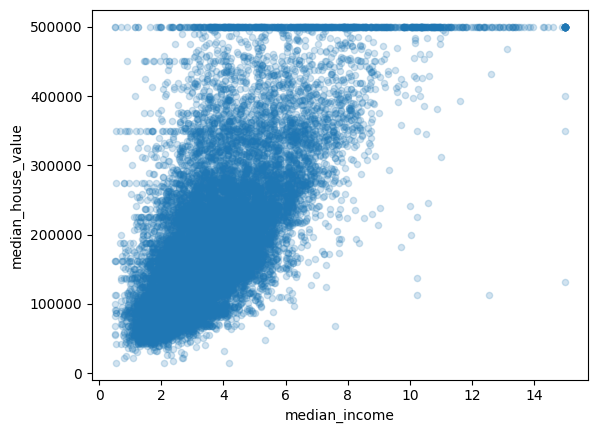

In [56]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)
plt.show()

The plot reveals strong correlation between `median_income` and `median_house_value`